In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
titanic_df = pd.read_csv(r'titanic_train.csv')
#df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
titanic_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

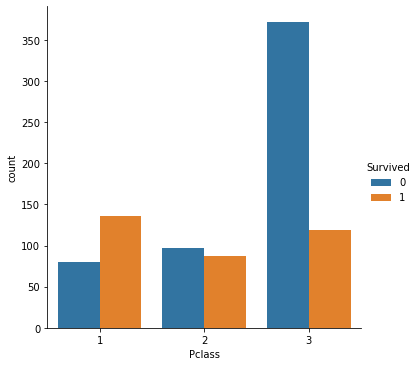

In [27]:
# survival count of Pclass
sns.catplot(x='Pclass' , hue='Survived' ,data=titanic_df ,kind='count')

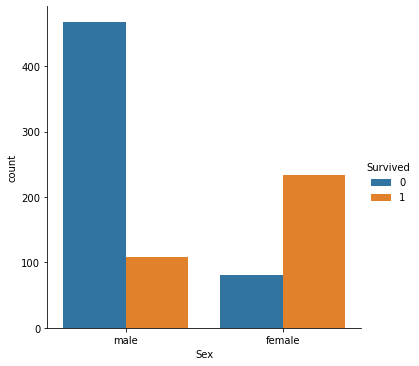

In [28]:
#survival count of Sex
sns.catplot(x='Sex' , hue='Survived' ,data=titanic_df ,kind='count')

In [29]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
titanic_df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

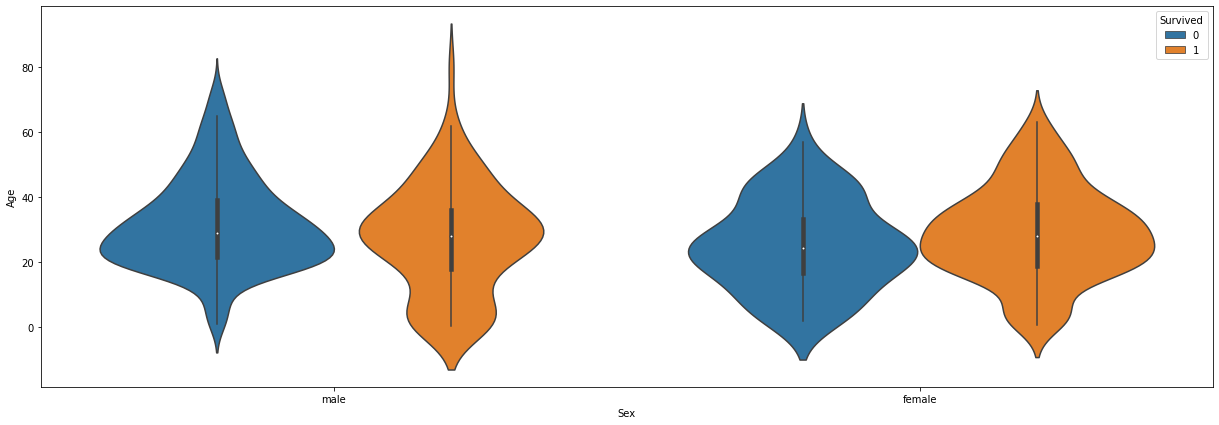

In [31]:
# histplot of to see distribution of servivied age
sns.violinplot(x='Sex',y='Age',hue='Survived' ,data=titanic_df)
plt.rcParams['figure.figsize']=(21,7)

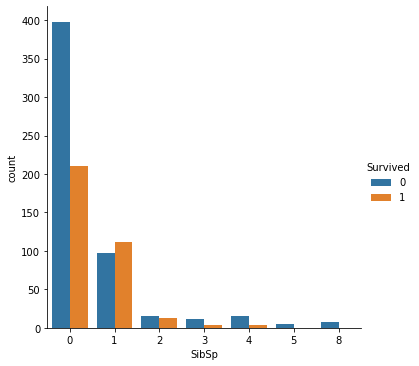

In [32]:
# survival count of Pclass
sns.catplot(x='SibSp' , hue='Survived' ,data=titanic_df ,kind='count')

passenger with SibSp=5 has less chances of servival , where as passenger with SibSp=1 has highest chances of servival.

In [34]:
titanic_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

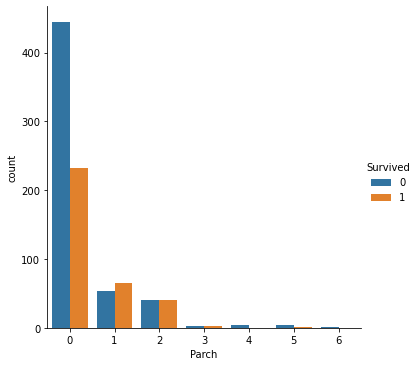

In [35]:
sns.catplot(x='Parch' , hue='Survived' ,data=titanic_df ,kind='count')

In [36]:
df=titanic_df.groupby('Pclass')['Fare'].value_counts()
df.head()

Pclass  Fare 
1       26.55    15
        52.00     7
        0.00      5
        30.00     5
        30.50     5
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

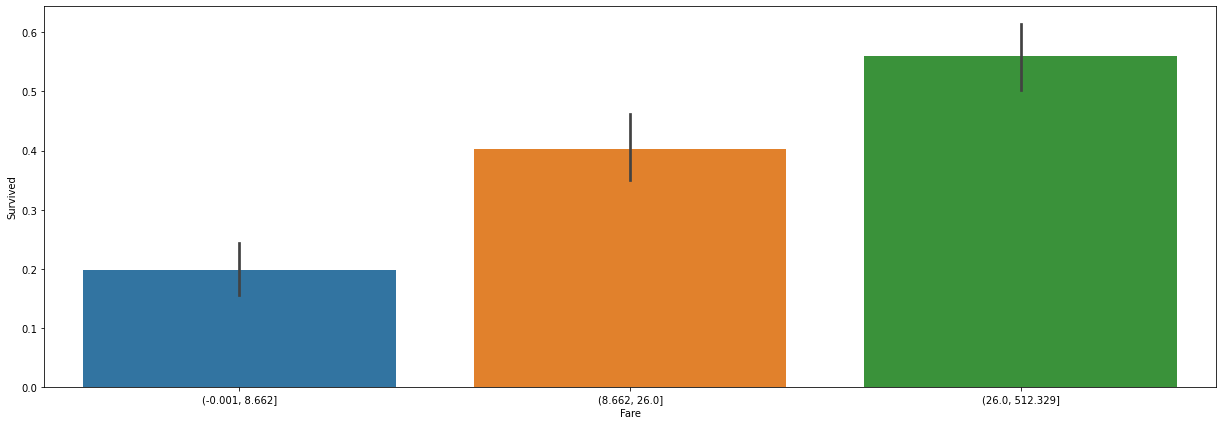

In [37]:
df_Fair_range = pd.qcut(titanic_df['Fare'],3)
sns.barplot(x=df_Fair_range ,y='Survived'  ,data=titanic_df)

Fair and survival rate has positive correlation as fair increases survival rate incrases.

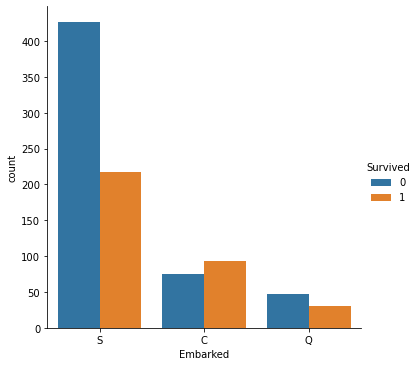

In [38]:
sns.catplot(x='Embarked' ,hue='Survived' ,kind='count' ,data=titanic_df)

'C' catgory has heighest rate of survive as compired to 'S 'and 'Q'.

#### Feature selection 

we can see ['PassengerId','Name', 'Sex','Cabin'] are not Survival deciding features . So, we will drop them 

In [ ]:
 titanic_df.drop(['PassengerId','Name','Cabin'] ,axis=1 ,inplace=True)


In [40]:
print(titanic_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


#### Check for null entries

In [41]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Age has 177 null entries and Embarked has 2 null entries.will Age by mean

In [42]:
# calculating total number of count of each catagory in column
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
# calculating most frequently occured value in column
titanic_df['Embarked'].mode()

0    S
dtype: object

we can see in 'Embarked' most frequently occured value in column is 'S' ,so will fill null values with it

#### Filling data in 'Embarked'

In [44]:
titanic_df['Embarked'].fillna('S',inplace=True)
titanic_df['Embarked'].isnull().sum()

0

#### Filling the null values in age column

since we have 177 NULL values in Age column we will fill them randomly with values in range of +/- 1 std deviation form mean.

In [45]:
age_mean=titanic_df['Age'].mean()
age_mean
age_std_dev=titanic_df['Age'].std()
print("Mean of Age :",age_mean,'\nStandard deviation of Age :',age_std_dev)

Mean of Age : 29.69911764705882 
Standard deviation of Age : 14.526497332334044


In [46]:
age_upper=round(age_mean+age_std_dev)
age_lower=round(age_mean-age_std_dev)
print("Upper and Lower limits are :",age_upper,age_lower)

Upper and Lower limits are : 44 15


In [47]:
index=titanic_df[titanic_df['Age'].isnull()].index.to_list()
index

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

In [48]:
 
fill=np.random.randint(15,44,size=177 )
fill=pd.Series(fill)
fill

0      22
1      35
2      31
3      29
4      42
       ..
172    39
173    36
174    37
175    36
176    25
Length: 177, dtype: int32

In [49]:
# to iterate over multiple lists at a time
import itertools 

In [50]:

for i,j in  zip(fill ,index):
    print(i,j)
    titanic_df['Age'][j]=i
    print(titanic_df['Age'][i])

22 5
15.0
35 17
42.0
31 19
nan
29 26
nan
42 28
nan
31 29
nan
40 31
40.0
36 32
nan
28 36
42.0
39 42
14.0
22 45
15.0
43 46
3.0
25 47
38.0
19 48
31.0
34 55
28.0
31 64
40.0
38 65
18.0
15 76
55.0
38 77
18.0
42 82
39.0
34 87
28.0
18 95
31.0
43 101
3.0
15 107
55.0
23 109
28.0
21 121
34.0
21 126
34.0
27 128
19.0
40 140
40.0
43 154
3.0
30 158
40.0
18 159
31.0
32 166
36.0
43 168
3.0
40 176
40.0
17 180
35.0
40 181
40.0
32 185
36.0
20 186
35.0
19 196
31.0
37 198
21.0
41 201
27.0
28 214
42.0
36 223
28.0
43 229
3.0
18 235
31.0
34 240
28.0
35 241
42.0
43 250
3.0
32 256
36.0
35 260
42.0
39 264
14.0
19 270
31.0
15 274
55.0
15 277
55.0
34 284
28.0
43 295
3.0
19 298
31.0
17 300
35.0
18 301
31.0
36 303
28.0
31 304
40.0
18 306
31.0
32 324
36.0
19 330
31.0
32 334
36.0
17 335
35.0
15 347
55.0
26 351
29.0
41 354
27.0
19 358
31.0
35 359
42.0
35 364
42.0
36 367
28.0
42 368
39.0
33 375
66.0
27 384
19.0
26 388
29.0
30 409
40.0
24 410
8.0
24 411
8.0
19 413
31.0
41 415
27.0
19 420
31.0
16 425
2.0
25 428
38.0
42 431

In [51]:
#checking no of null values in Age Column
titanic_df['Age'].isna().sum()

0

#### we can see there is no null value present in Age Column

In [52]:
#Dispalying Age column filled with new  values
titanic_df['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     22.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    35.0
18    31.0
19    31.0
Name: Age, dtype: float64

#### Checking Collinearity 

In [53]:
## correlation metrics
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066407,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.324011,0.083081,0.018443,-0.549500
Age,-0.066407,-0.324011,1.000000,-0.226342,-0.172337,0.094921
SibSp,-0.035322,0.083081,-0.226342,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172337,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.094921,0.159651,0.216225,1.000000


<AxesSubplot:>

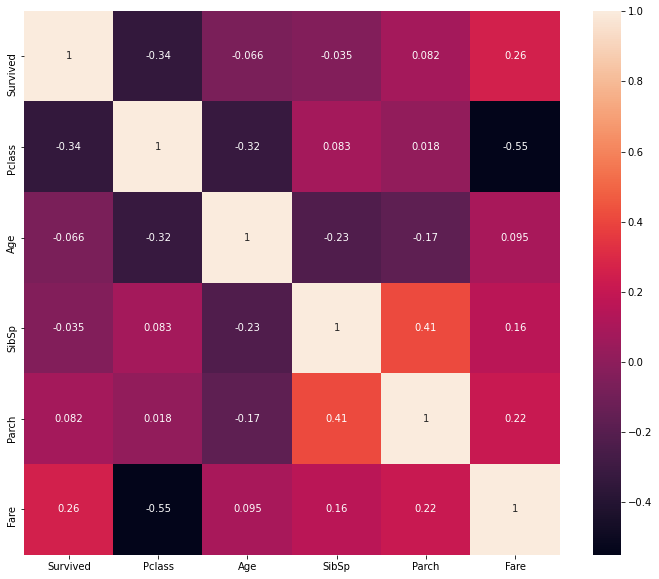

In [54]:
# using pearson correlation
plt.figure(figsize=(12,10))
cor=titanic_df.corr()
sns.heatmap(cor ,annot=True )

#### Checking Collinearity of target variable with other independent variables

In [55]:
titanic_df.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.066407
Pclass     -0.338481
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Correlation with target')

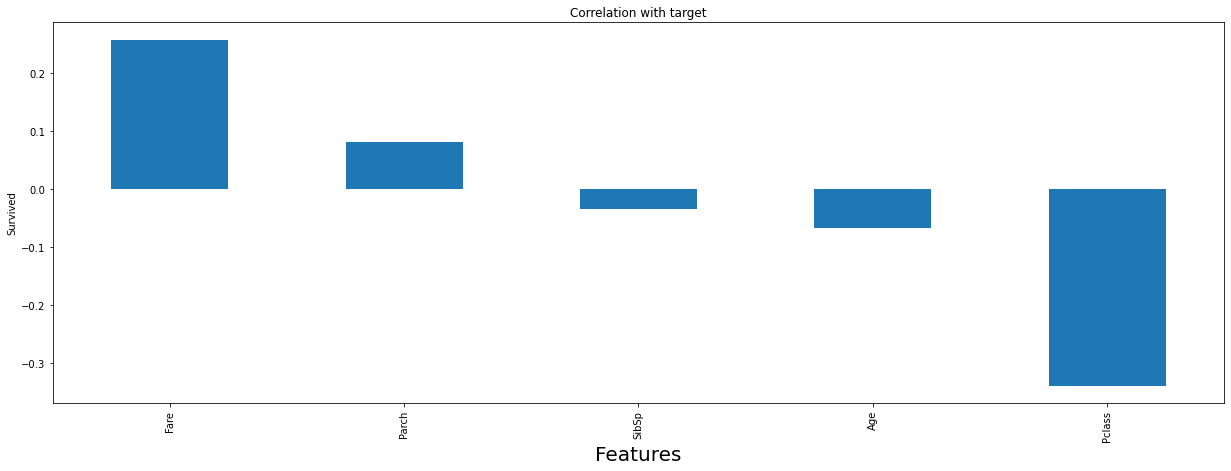

In [56]:
titanic_df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Survived')
plt.title('Correlation with target')

#### Data Preprocessing for 'sex' feature into a numeric value: male(1) and  female(0) and 'Embarked' feature

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
LE = LabelEncoder()
titanic_df['Sex'] = LE.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = LE.fit_transform(titanic_df['Embarked'])

In [59]:
print(titanic_df['Embarked'])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


here we can find S,C and Q got transformed in 1,2 ,3 as S=2,C=0,Q =1 

In [60]:
print(titanic_df['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


Here we can find Male and Female got transformed in 0,1 as Male=1,Female=0

#### Splitting Data in to Train Test 

In [63]:
# Catagorical data column encoding using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
onc= OrdinalEncoder()
titanic_df['Ticket']=onc.fit_transform(titanic_df['Ticket'].values.reshape(-1,1))

In [64]:
x = titanic_df.drop('Survived',axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523.0,7.2500,2
1,1,0,38.0,1,0,596.0,71.2833,0
2,3,0,26.0,0,0,669.0,7.9250,2
3,1,0,35.0,1,0,49.0,53.1000,2
4,3,1,35.0,0,0,472.0,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101.0,13.0000,2
887,1,0,19.0,0,0,14.0,30.0000,2
888,3,0,25.0,1,2,675.0,23.4500,2
889,1,1,26.0,0,0,8.0,30.0000,0


In [65]:
y=titanic_df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Logistic Regression  Model-1

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
lr=LogisticRegression()

#### will try to find out best value Random State

In [69]:
max_accu = 0
max_randst = 0
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    
    pred_test=lr.predict(x_test)
    accu_score= accuracy_score(y_test,pred_test)
    if max_accu<accu_score:
        max_accu= accu_score
        max_randst= i
    
print(confusion_matrix(y_test,pred_test))

[[103  12]
 [ 29  35]]


In [70]:
print("max accuracy score is :", round(max_accu*100 ,1),"at random state :",max_randst)

max accuracy score is : 87.2 at random state : 455


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=417)
lr.fit(x_train,y_train)

pred_test=lr.predict(x_test)
accu_score= accuracy_score(y_test,pred_test)

In [72]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print("Accuracy score is :",round(accu_score*100 ,2),'\n')
print("Confusion_matrix is :\n")
print(confusion_matrix(y_test,pred_test),'\n')
print("Classification report :\n")
print(classification_report(y_test,pred_test))

Accuracy score is : 86.59 

Confusion_matrix is :

[[108   7]
 [ 17  47]] 

Classification report :

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       115
           1       0.87      0.73      0.80        64

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



### Random Forest Classifier Model-2

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2),'\n')
print("Confusion_matrix is :\n")
print(confusion_matrix(y_test,predrf),'\n')
print("Classification Report score is :\n")
print(classification_report(y_test,predrf))

Accuracy score is : 88.83 

Confusion_matrix is :

[[109   6]
 [ 14  50]] 

Classification Report score is :

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       115
           1       0.89      0.78      0.83        64

    accuracy                           0.89       179
   macro avg       0.89      0.86      0.87       179
weighted avg       0.89      0.89      0.89       179



### SVC Model-3

In [75]:
from sklearn.svm import SVC

In [76]:
sv = SVC()
sv.fit(x_train,y_train)
predrf=sv.predict(x_test)
print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2),'\n')
print("Confusion_matrix is :\n")      
print(confusion_matrix(y_test,predrf),'\n')
print("Classification Report score is :\n")
print(classification_report(y_test,predrf))

Accuracy score is : 66.48 

Confusion_matrix is :

[[102  13]
 [ 47  17]] 

Classification Report score is :

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       115
           1       0.57      0.27      0.36        64

    accuracy                           0.66       179
   macro avg       0.63      0.58      0.57       179
weighted avg       0.64      0.66      0.63       179



### Decision Tree Model-4

In [77]:
def model_implement(model_ref ,x_train,x_test,y_train,y_test):
    model_ref.fit(x_train,y_train)
    predrf=sv.predict(x_test)
    print("Accuracy score is :",round(accuracy_score(y_test,predrf)*100 ,2),'\n')
    print(confusion_matrix(y_test,predrf),'\n')
    print("Classification Report score is :\n")
    print(classification_report(y_test,predrf))

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dc= DecisionTreeClassifier()
model_implement(dc ,x_train,x_test,y_train,y_test)

Accuracy score is : 66.48 

[[102  13]
 [ 47  17]] 

Classification Report score is :

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       115
           1       0.57      0.27      0.36        64

    accuracy                           0.66       179
   macro avg       0.63      0.58      0.57       179
weighted avg       0.64      0.66      0.63       179



In [80]:
Model_report=pd.DataFrame()
Model_report['Model_name']=['Logistic Regression','Random Forest Classifier','SVC','Decision Tree Classifier']
Model_report['Accuracy_Score']=[87.71,85.47,65.92,70.39]
Model_report['Confusion_matrix']=['[[106   9][ 13  51]]',
                                 '[[104  11][ 15  49]]' ,
                                  '[[101  14][ 47  17]]',
                                  '[[104  11][ 42  22]]']

### Model_report

In [81]:

Model_report

,Model_name,Accuracy_Score,Confusion_matrix
0,Logistic Regression,87.71,[[106 9][ 13 51]]
1,Random Forest Classifier,85.47,[[104 11][ 15 49]]
2,SVC,65.92,[[101 14][ 47 17]]
3,Decision Tree Classifier,70.39,[[104 11][ 42 22]]


Since Logistic regression is performing better in terms of Accuracy_score and confusion matrix among rst of the all we will continue with it .

### Hyper parameter tuning

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']

param_grid = dict(solver = solver_options, multi_class = 
multi_class_options, class_weight = class_weight_options)
grid = GridSearchCV(lr, param_grid, cv=12, scoring = 
'accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'class_weight': 'balanced', 'multi_class': 'ovr', 'solver': 'newton-cg'}

In [84]:
#prediction with best parameter
grid_pred=grid.best_estimator_.predict(x_test) 
# best score 
accuracy_score(y_test,grid_pred)

0.8491620111731844

#### ROC AUC plot


Text(0.5, 1.0, 'ROC AUC PLOT')

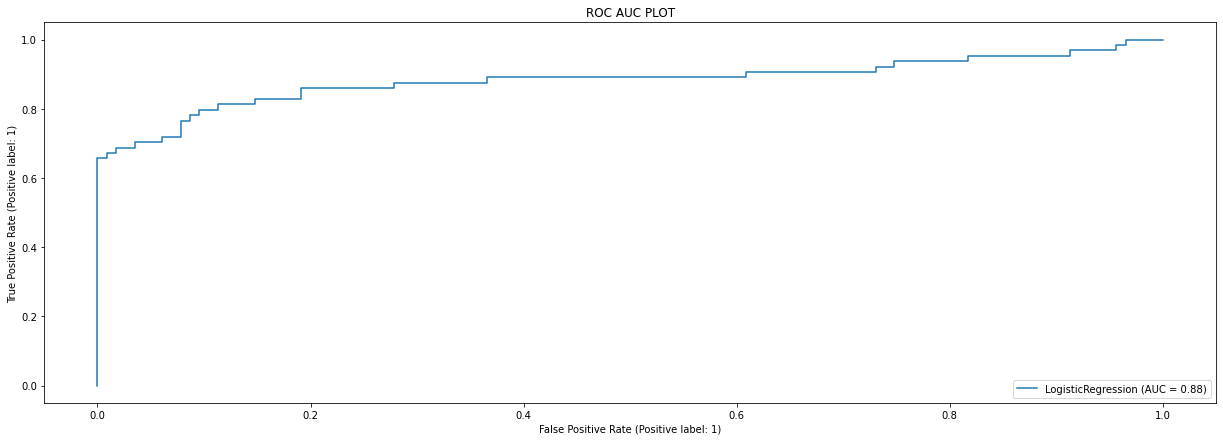

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test , y_test)
plt.title("ROC AUC PLOT")

AUC is 0.81 and Accuracy is 0.78 which is good .

In [86]:
import joblib
joblib.dump(grid.best_estimator_,"Titanic_Prediction.pkl")

['Titanic_Prediction.pkl']